# Unveiling Trends: An Exploration of Melbourne's Housing Market

Author: Jenny Mai

## 1. Introduction

**Title:** Melbourne Real Estate

**Motivation:** Embarking on a study abroad journey to Melbourne, the exploration of the city's housing market holds significant personal relevance for me:

Preparation for Arrival: As I gear up for my study abroad adventure, gaining insights into Melbourne's housing market becomes crucial for planning your accommodation. Understanding the trends and pricing dynamics will aid in making informed decisions before my arrival.

Financial Planning: Exploring housing prices allows me to estimate the potential financial commitment involved in securing accommodation. This analysis becomes a pivotal aspect of my financial planning for the study abroad period.

Neighborhood Preferences: Melbourne is a diverse city with various suburbs, each offering a unique living experience. Analyzing housing data enables me to identify neighborhoods that align with my preferences, ensuring a comfortable and suitable living environment during my stay.

**Research Questions:** To what extent can we predict housing prices in Melbourne based on factors such as the number of rooms, distance from the CBD, postcodes, and number of car spots? What explanatory variables should we include to build the simpliest best-performing linear model for price prediction?

Is there a linear relationship between the log-odds of the success level of 'HasPool' (whether or not the property has a private pool) and 'Rooms', 'Price', 'YearBuilt', 'Distance', and 'Landsize' in the sample? How does a classifier built on this model perform on new data?

What is the relationship between the suburbs and housing prices in the dataset?

Is there a significant difference in the mean housing prices between houses west and east of Melbourne University in the Melbourne housing population?

______________

**Dataset:** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market. Variables in the dataset:

Suburb: The suburb in Melbourne where the property is located

Address: The address of the property

Rooms: Number of rooms in the property

Price: Price of the property in Australian dollars

Method:
    S: Property sold
    SP: Property sold prior
    PI: Property passed in
    PN: Sold prior not disclosed
    SN: Sold not disclosed
    NB: No bid
    VB: Vendor bid
    W: Withdrawn prior to auction
    SA: Sold after auction
    SS: Sold after auction price not disclosed
    N/A: Price or highest bid not available
    
Type:
    br: Bedroom(s)
    h: House, cottage, villa, semi, terrace
    u: Unit, duplex
    t: Townhouse
    dev site: Development site
    o res: Other residential
    
SellerG: Real Estate Agent

Date: Date of sale

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east, etc.)

Propertycount: Number of properties that exist in the suburb

Bedroom2: Scraped number of Bedrooms from a different source

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Latitude

Longtitude: Longitude.

In [226]:
# Imports here
import numpy as np
import pandas as pd
import statsmodels.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [227]:
df = pd.read_csv("melb.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [228]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [229]:
# Potential extreme outliers
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [230]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values (%)': missing_percentage})
missing_df

,Missing Values (%)
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,21.832057
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.002869
Postcode,0.002869


In [231]:
# Potential duplicate properties
len(df) - len(df['Address'].unique())

848

**Dataset Characteristics:**

Limitations: The dataset may have limitations such as potential biases due to scraping from different sources. There are some outliers and a lot of null values in the data. Additionally, we are aiming to predict the price of houses in Melbourne. This dataset is housing transactions, so there might be houses that are repeated / being sold many times. This might concern the independency characteristic of the dataset.

Included Information: It includes crucial details like property size, land size, and council area.

Missing Information: Some variables, such as BuildingArea, YearBuilt, and Landsize, might be missing or incomplete, potentially affecting certain analyses.

Additions: Additional data, such as economic indicators or mortgage rates, could enhance the predictive power of the data.

Ethical Considerations: Ensuring responsible use of the data, especially concerning privacy and fairness in housing assessments.
______

## Data Cleaning:

In [232]:
# We will keep only the latest transaction of each address to ensure that each entry is a unique property and is independent from other entries.
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date', ascending=False)
df = df.drop_duplicates(subset=['Address', 'Suburb'])
df['Days'] = (df['Date'].max() - df['Date']).dt.total_seconds() / (60 * 60 * 24)
df = df.drop(['Address', 'Date'], axis = 1)
df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Days
33900,Wyndham Vale,4,h,535000.0,SP,Sweeney,27.2,3024.0,4.0,2.0,2.0,545.0,198.0,2010.0,Wyndham City Council,-37.89550,144.61192,Western Metropolitan,5262.0,0.0
33529,Middle Park,4,h,2650000.0,S,Cayzer,3.0,3206.0,4.0,2.0,0.0,199.0,192.0,1900.0,Port Phillip City Council,-37.85372,144.96579,Southern Metropolitan,2019.0,0.0
33469,Kew,4,h,3900000.0,PI,Jellis,5.4,3101.0,4.0,3.0,3.0,774.0,115.0,2004.0,Boroondara City Council,-37.81152,145.04885,Southern Metropolitan,10331.0,0.0
33475,Kew East,4,h,2400000.0,VB,Jellis,7.3,3102.0,4.0,2.0,2.0,808.0,280.0,1939.0,Boroondara City Council,-37.78783,145.06274,Southern Metropolitan,2671.0,0.0
33479,Kings Park,3,h,585000.0,SP,Frank,14.0,3021.0,3.0,1.0,4.0,706.0,18.0,1985.0,Brimbank City Council,-37.74012,144.77180,Western Metropolitan,2878.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,Coburg,3,h,675000.0,PI,Walshe,7.8,3058.0,3.0,1.0,2.0,142.0,123.0,2005.0,Darebin City Council,-37.73820,144.97300,Northern Metropolitan,11204.0,772.0
3828,Elwood,3,t,1395000.0,S,Pride,7.7,3184.0,3.0,2.0,1.0,400.0,126.0,1996.0,Port Phillip City Council,-37.88290,144.97970,Southern Metropolitan,8989.0,772.0
6962,Moorabbin,3,h,1417250.0,S,Buxton,14.6,3189.0,3.0,2.0,2.0,653.0,180.0,1950.0,Kingston City Council,-37.94180,145.05490,Southern Metropolitan,2555.0,772.0
6781,Mont Albert,2,u,750000.0,S,RW,11.8,3127.0,2.0,2.0,2.0,0.0,80.0,2003.0,Boroondara City Council,-37.81610,145.10980,Eastern Metropolitan,2079.0,772.0


_______

## 2. Linear Regression and Feature Selection

**Goal:** Explore the linear relationship between housing prices (numeric response variable) and various factors in the Melbourne Housing Market dataset, both within the sample and the broader population.

**Research Question:** To what extent can we predict housing prices in Melbourne based on factors such as the number of rooms, distance from the CBD, postcodes, and number of car spots? What explanatory variables should we include to build the simpliest best-performing linear model?

In [233]:
model = smf.OLS.from_formula('Price ~ Rooms + Distance + Postcode + Car', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     1635.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:17:36   Log-Likelihood:            -1.2815e+05
No. Observations:                8796   AIC:                         2.563e+05
Df Residuals:                    8791   BIC:                         2.563e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.462e+06   1.71e+05    -26.085      0.000    -4.8e+06   -4.13e+06
Rooms       3.953e+05   6353.057     62.217      0.000    3.83e+05    4.08e+05
Distance   -5.398e+04    973.382    -55.453      0.000   -5.59e+04   -5.21e+04
Postcode    1544.2067     55.899     27.625      0.000    1434.632    1653.781
Car         7.639e+04   6245.876     12.230      0.000    6.41e+04    8.86e+04
==============================================================================
Omnibus:                     5219.024   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136067.547
Skew:                           2.368   Prob(JB):                         0.00
Kurtosis:                      21.677   Cond. No.                     9.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Linear Regression Equation:**

$\widehat{Price} = -4.462\cdot10^{6} + 3.953\cdot10^{5} * Rooms - 5.398\cdot10^{4} * Distance + 1544.2067 * Postcode + 7.639\cdot10^{4} * Car$

## Check for Linear Regression conditions:

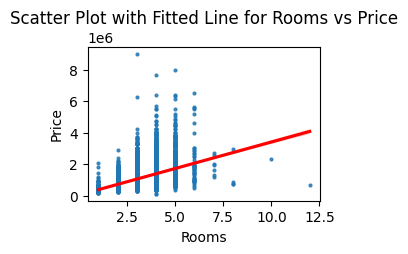

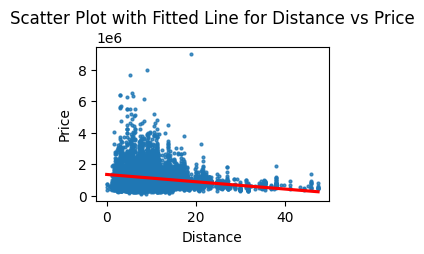

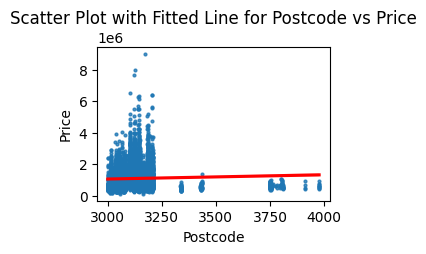

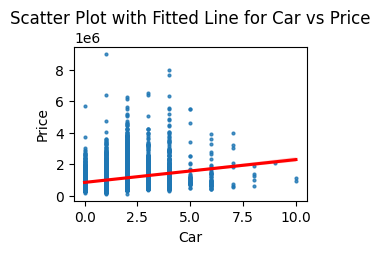

In [234]:
# Check for Lineariy using scatter plots
plt.figure(figsize=(3, 2))
sns.regplot(x='Rooms', y='Price', data=df, scatter_kws={'s': 4}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Fitted Line for Rooms vs Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(3, 2))
sns.regplot(x='Distance', y='Price', data=df, scatter_kws={'s': 4}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Fitted Line for Distance vs Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(3, 2))
sns.regplot(x='Postcode', y='Price', data=df, scatter_kws={'s': 4}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Fitted Line for Postcode vs Price')
plt.xlabel('Postcode')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(3, 2))
sns.regplot(x='Car', y='Price', data=df, scatter_kws={'s': 4}, line_kws={'color': 'red'})
plt.title('Scatter Plot with Fitted Line for Car vs Price')
plt.xlabel('Car')
plt.ylabel('Price')
plt.show()

**Rooms and Price**: This is not a linear relationship. The data points are not scattered randomly around a straight line, and there is an up-and-down curve trend to the points clustering around the middle of the plot. This suggests that the relationship between the number of rooms and price is not quite linear.

**Distance and Price**: The fitted line is relatively close to a straight line, which suggests that the relationship between distance and price is approximately linear.

**Postcode and Price**: The points are clustering across the line, suggesting that the relationship between postcode and price is not linear. This can be normal because there is a certain pattern for postcodes.

**Car and Price**: There is a curve trend to the points. It is not linear.

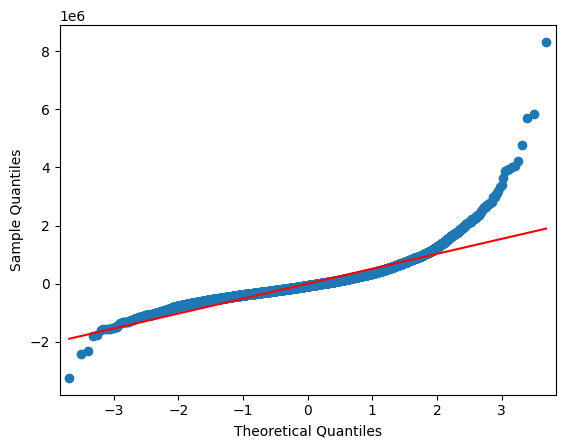

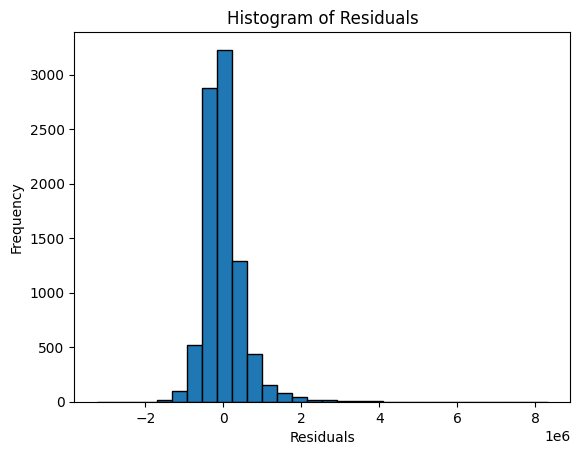

In [235]:
# Checking the normality of residuals
residuals = model.resid
smf.qqplot(residuals, line='s')
plt.show()

plt.hist(residuals, bins=30, edgecolor='k')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Both plots show that the residuals are not completely normally distributed. The points on the QQ plot start to deviate significantly from the straight line in the tail of the distribution. Similarly in the histogram, the residuals are normally distributed at the left of the x-axis (residuals from 0 to 4e6). There are a few high residuals on the right of the histogram, but the left part looks normal.

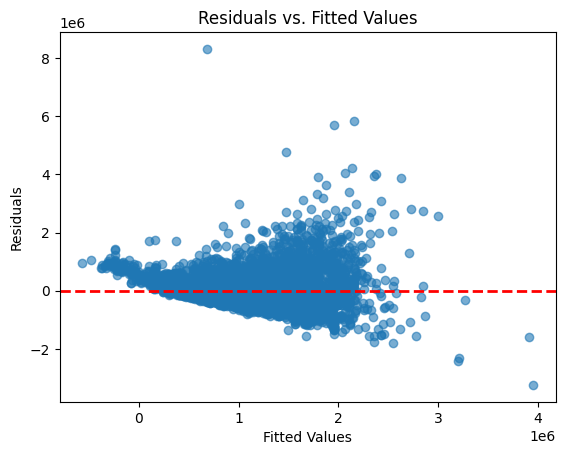

In [236]:
# Checking the variance of residuals for independency
plt.scatter(model.predict(), residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In the residual vs fitted plot, the variance of the residuals appears to be quite constant for low fitted values (< 1.5). The residuals are more spread out at higher fitted values (> 1.5), clustering around the 1e6 to 2.5e6 range.

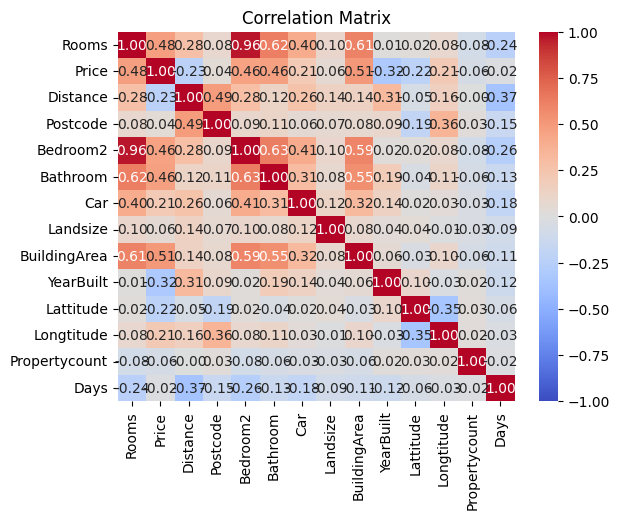

In [237]:
# Check for Multicolinearity
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

The heatmap shows that the variables in your dataset have pretty low multicolinearity. The high correlations are 0.5 to 0.6, which indicates a moderate positive correlation. One peak correlation is Bedroom2 and Rooms. Overall, there is some linear relationship between the variables, but it is not very strong.

**=> Linear Regression Assumptions**: While some assumptions are met reasonably well, there are indications of non-linearity in the relationship between some variables, as well as potential deviations from normality in the residuals.
________

### Feature Selection: Backward Elimination

Goal: We want to reduce the number of explanatory variables used to predict price.

We can use backward elimination or Lasso in our case. However, the dataset has many complex categorical variables, so we will use Backward elimination and OLS model to achieve our goals.

In [238]:
# Dropping Bedroom2 because of Multicolinearity
df = df.drop(['Bedroom2'], axis=1)

In [239]:
def backward_elimination(X, y):
    results_df = pd.DataFrame(columns=['Feature Removed', 'Adjusted R^2', 'R^2'])
    
    current_model = smf.OLS.from_formula(f'{y.name} ~ {" + ".join(X.columns)}', data=df).fit()
    results_df = pd.concat([results_df, pd.DataFrame({'Feature Removed': ['----'], 'Adjusted R^2': [current_model.rsquared_adj], 'R^2': [current_model.rsquared]})], ignore_index=True)
    
    for feature in X.columns:
        X_drop = X.drop(feature, axis=1)
        formula = f'{y.name} ~ {" + ".join(X_drop.columns)}'
        test_model = smf.OLS.from_formula(formula, data=df).fit()
        results_df = pd.concat([results_df, pd.DataFrame({'Feature Removed': [feature], 'Adjusted R^2': [test_model.rsquared_adj], 'R^2': [test_model.rsquared]})], ignore_index=True)
    results_df = results_df.sort_values(by='Adjusted R^2', ascending=False)
    drop = results_df.loc[results_df.index[0], 'Feature Removed']
    if drop == '----':
        drop = results_df.loc[results_df.index[1], 'Feature Removed']
    return results_df, drop

In [240]:
response_variable = df['Price']
explanatory_variables = df.drop(['Price'], axis=1)

In [241]:
round1, drop_variable = backward_elimination(explanatory_variables, response_variable)
round1

,Feature Removed,Adjusted R^2,R^2
6,Distance,0.736559,0.753872
17,Propertycount,0.736548,0.753892
7,Postcode,0.736548,0.753892
0,----,0.736548,0.753892
16,Regionname,0.736548,0.753892
13,CouncilArea,0.736548,0.753892
15,Longtitude,0.736474,0.753793
14,Lattitude,0.736075,0.753420
10,Landsize,0.735679,0.753050
4,Method,0.734309,0.751679


In [242]:
# Highest: 0.736559
# Significant level: 0.005
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round2, drop_variable = backward_elimination(explanatory_variables, response_variable)
round2

Variable dropped is:  Distance


,Feature Removed,Adjusted R^2,R^2
6,Postcode,0.736559,0.753872
0,----,0.736559,0.753872
12,CouncilArea,0.736559,0.753872
16,Propertycount,0.736559,0.753872
15,Regionname,0.736559,0.753872
14,Longtitude,0.736485,0.753773
13,Lattitude,0.736088,0.753402
9,Landsize,0.735688,0.753028
4,Method,0.734324,0.751663
8,Car,0.732419,0.749974


In [243]:
# There are several models with removed variables that returned adjusted R^2 within a signficant level of 0.005 as the current model's
# We will continue to eliminate those columns
# Highest: 0.736559
# Significant level: 0.005
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round3, drop_variable = backward_elimination(explanatory_variables, response_variable)
round3

Variable dropped is:  Postcode


,Feature Removed,Adjusted R^2,R^2
0,----,0.736559,0.753872
11,CouncilArea,0.736559,0.753872
14,Regionname,0.736559,0.753872
15,Propertycount,0.736559,0.753872
13,Longtitude,0.736485,0.753773
12,Lattitude,0.736088,0.753402
8,Landsize,0.735688,0.753028
4,Method,0.734324,0.751663
7,Car,0.732419,0.749974
16,Days,0.731304,0.748932


In [244]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round4, drop_variable = backward_elimination(explanatory_variables, response_variable)
round4

Variable dropped is:  CouncilArea


,Feature Removed,Adjusted R^2,R^2
13,Regionname,0.736559,0.753872
0,----,0.736559,0.753872
14,Propertycount,0.736559,0.753872
12,Longtitude,0.736485,0.753773
11,Lattitude,0.736088,0.753402
8,Landsize,0.735688,0.753028
4,Method,0.734324,0.751663
7,Car,0.732419,0.749974
15,Days,0.731304,0.748932
10,YearBuilt,0.730618,0.748291


In [245]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round5, drop_variable = backward_elimination(explanatory_variables, response_variable)
round5

Variable dropped is:  Regionname


,Feature Removed,Adjusted R^2,R^2
0,----,0.736559,0.753872
13,Propertycount,0.736559,0.753872
12,Longtitude,0.736485,0.753773
11,Lattitude,0.736088,0.753402
8,Landsize,0.735688,0.753028
4,Method,0.734324,0.751663
7,Car,0.732419,0.749974
14,Days,0.731304,0.748932
10,YearBuilt,0.730618,0.748291
6,Bathroom,0.726871,0.744790


In [246]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round6, drop_variable = backward_elimination(explanatory_variables, response_variable)
round6

Variable dropped is:  Propertycount


,Feature Removed,Adjusted R^2,R^2
0,----,0.736559,0.753872
12,Longtitude,0.736485,0.753773
11,Lattitude,0.736088,0.753402
8,Landsize,0.735688,0.753028
4,Method,0.734324,0.751663
7,Car,0.732419,0.749974
13,Days,0.731304,0.748932
10,YearBuilt,0.730618,0.748291
6,Bathroom,0.726871,0.744790
2,Rooms,0.723789,0.741910


In [247]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round7, drop_variable = backward_elimination(explanatory_variables, response_variable)
round7

Variable dropped is:  Longtitude


,Feature Removed,Adjusted R^2,R^2
0,----,0.736485,0.753773
11,Lattitude,0.736051,0.753338
8,Landsize,0.735629,0.752943
4,Method,0.734230,0.751545
7,Car,0.732329,0.749859
12,Days,0.731241,0.748843
10,YearBuilt,0.730526,0.748174
6,Bathroom,0.726759,0.744654
2,Rooms,0.723777,0.741867
5,SellerG,0.719955,0.730399


In [248]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round8, drop_variable = backward_elimination(explanatory_variables, response_variable)
round8

Variable dropped is:  Lattitude


,Feature Removed,Adjusted R^2,R^2
0,----,0.736051,0.753338
8,Landsize,0.735192,0.752505
4,Method,0.733805,0.751118
7,Car,0.731812,0.749346
11,Days,0.730821,0.748419
10,YearBuilt,0.730079,0.747726
6,Bathroom,0.726357,0.744247
2,Rooms,0.723360,0.741446
5,SellerG,0.719638,0.730062
9,BuildingArea,0.718333,0.736748


In [249]:
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round9, drop_variable = backward_elimination(explanatory_variables, response_variable)
round9

Variable dropped is:  Landsize


,Feature Removed,Adjusted R^2,R^2
0,----,0.735192,0.752505
4,Method,0.732912,0.750253
7,Car,0.730686,0.748262
10,Days,0.729687,0.747329
9,YearBuilt,0.729255,0.746925
6,Bathroom,0.725468,0.743385
2,Rooms,0.722286,0.740411
5,SellerG,0.718762,0.729187
8,BuildingArea,0.717329,0.735777
3,Type,0.710159,0.729042


In [250]:
# Significant level 0.005, take up to 0.731559
print('Variable dropped is: ', drop_variable)
explanatory_variables = explanatory_variables.drop([drop_variable], axis=1)
round10, drop_variable = backward_elimination(explanatory_variables, response_variable)
round10

Variable dropped is:  Method


,Feature Removed,Adjusted R^2,R^2
0,----,0.732912,0.750253
6,Car,0.728484,0.746081
9,Days,0.727855,0.745493
8,YearBuilt,0.726657,0.744372
5,Bathroom,0.723626,0.741538
2,Rooms,0.720192,0.738327
4,SellerG,0.716919,0.727283
7,BuildingArea,0.715152,0.733613
3,Type,0.707550,0.726470
1,Suburb,0.607559,0.619027


We will stop here and select the current model because the next best model removing "Car" has an adjusted R^2 of 0.728, which is more than our significant level 0.005 lower than our best achieved adjusted R^2 of 0.736559.

I chose backward elimination for feature selection in this scenario because it offers several advantages over other feature selection techniques:

1. Simplicity and interpretability: Backward elimination is a straightforward and intuitive method that is easy to understand and implement. It starts with a full model and iteratively removes features that contribute the least to the model's performance. This makes it easy to interpret the results and understand which features are most important for the model.

2. Adaptability to data: Backward elimination is adaptable to the specific data being analyzed. It does not rely on any pre-defined criteria for feature selection, but instead, it evaluates the importance of each feature based on its contribution to the model's adjusted R-squared value. This makes it a more data-driven approach compared to other techniques that may not capture the nuances of the specific dataset.

3. Handling of correlated features: Backward elimination can effectively handle correlated features, even if they are highly correlated. By removing features that contribute least to the model, it can automatically eliminate redundant features while retaining those that provide unique information. This is important for linear regression, where multicollinearity can affect the stability and interpretation of the model's coefficients.

4. OLS models can handle complex categorical variables in the dataset such as Suburbs, wihout the need of creating too many dummy variables.

**Final model using Backward Elimination with Adjusted R^2:** The final predictors includes Car + Days + YearBuilt + Bathroom + Rooms + BuildingArea + SellerG + Type + Suburb

In [251]:
final_model = smf.OLS.from_formula('Price ~ Car + Days + YearBuilt + Bathroom + Rooms + BuildingArea + SellerG + Type + Suburb', data=df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     43.27
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        17:24:48   Log-Likelihood:            -1.2450e+05
No. Observations:                8796   AIC:                         2.501e+05
Df Residuals:                    8224   BIC:                         2.542e+05
Df Model:                         571                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                4.35e+06   3.33e+05     13.071      0.000     3.7e+06       5e+06
SellerG[T.Abercromby's]                 8.414e+05   2.08e+05      4.038      0.000    4.33e+05    1.25e+06
SellerG[T.Ace]                          1.938e+05   4.09e+05      0.474      0.636   -6.08e+05    9.96e+05
SellerG[T.Alexkarbon]                   9.372e+04   1.95e+05      0.481      0.630   -2.88e+05    4.75e+05
SellerG[T.Allens]                      -3.018e+05      4e+05     -0.754      0.451   -1.09e+06    4.82e+05
SellerG[T.Anderson]                    -8607.4553   2.73e+05     -0.031      0.975   -5.45e+05    5.27e+05
SellerG[T.Appleby]                     -2.992e+04   3.16e+05     -0.095      0.924   -6.48e+05    5.89e+05
SellerG[T.Aquire]                       8036.5540   3.16e+05      0.025      0.980   -6.11e+05    6.27e+05
SellerG[T.Area]                           2.5e+05   2.98e+05      0.839      0.401   -3.34e+05    8.34e+05
SellerG[T.Ascend]                      -2.086e+05   3.11e+05     -0.672      0.502   -8.18e+05       4e+05
SellerG[T.Ash]                          1.455e+05   3.15e+05      0.462      0.644   -4.72e+05    7.63e+05
SellerG[T.Assisi]                        1.31e+06   3.97e+05      3.299      0.001    5.32e+05    2.09e+06
SellerG[T.Australian]                   7.564e+04   3.09e+05      0.244      0.807   -5.31e+05    6.82e+05
SellerG[T.Avion]                        1.817e+05   3.97e+05      0.458      0.647   -5.96e+05    9.59e+05
SellerG[T.Barlow]                       2.032e+05   2.15e+05      0.946      0.344   -2.18e+05    6.24e+05
SellerG[T.Barry]                        4.263e+04   1.81e+05      0.235      0.814   -3.13e+05    3.98e+05
SellerG[T.Bayside]                     -1.544e+05   3.12e+05     -0.496      0.620   -7.65e+05    4.56e+05
SellerG[T.Bekdon]                      -3.814e+04   2.33e+05     -0.164      0.870   -4.94e+05    4.18e+05
SellerG[T.Beller]                      -6.423e+04   2.21e+05     -0.291      0.771   -4.97e+05    3.69e+05
SellerG[T.Bells]                        3.699e+04   1.97e+05      0.188      0.851   -3.49e+05    4.23e+05
SellerG[T.Benlor]                       5796.3800    4.2e+05      0.014      0.989   -8.18e+05     8.3e+05
SellerG[T.Besser]                      -1.398e+04   3.09e+05     -0.045      0.964    -6.2e+05    5.92e+05
SellerG[T.Biggin]                       5.247e+04   1.83e+05      0.286      0.775   -3.07e+05    4.12e+05
SellerG[T.Boran]                        -7.13e+05   3.97e+05     -1.798      0.072   -1.49e+06    6.45e+04
SellerG[T.Boutique]                    -1.768e+05   3.22e+05     -0.549      0.583   -8.09e+05    4.55e+05
SellerG[T.Bowman]                      -2.584e+05   2.84e+05     -0.911      0.362   -8

**Interpret the slope coefficient for the 'YearBuilt' variable:**

For every one-year increase in the age of the property (YearBuilt), the predicted price of the property is expected to decrease by an average of $1,963.397.

**Variability in the response variable 'Price' explained by this model:**

The R-squared value of 0.750 indicates that the model explains 75.0% of the variability in the response variable 'Price'. This is considered a fairly high R-squared value, suggesting that the model is a good fit for the data.

The adjusted R-squared value is 0.733, which is slightly lower than the R-squared value. This is because the adjusted R-squared value penalizes the model for having more independent variables. However, the adjusted R-squared value is still relatively high, indicating that the model is a good fit for the data even after adjusting for the number of independent variables.

In [255]:
# Example Prediction:
car = 2
days = 350
year_built = 2000
bathroom = 2
rooms = 3
building_area = 150
seller_g = 'YPA'
property_type = 'h'
suburb = 'Parkville'

input_data = pd.DataFrame({
    'Car': [car],
    'Days': [days],
    'YearBuilt': [year_built],
    'Bathroom': [bathroom],
    'Rooms': [rooms],
    'BuildingArea': [building_area],
    'SellerG': [seller_g],
    'Type': [property_type],
    'Suburb': [suburb]
})

predicted_price = final_model.predict(input_data)
print("Predicted Price:", predicted_price[0])

Predicted Price: 1877990.6182280413


### Summary

***Research question:** "To what extent can we predict housing prices in Melbourne based on factors such as the number of rooms, distance from the CBD, postcodes, and the number of car spots? What explanatory variables should we include to build the simplest best-performing linear model?"*

**1. Identification of Relevant Factors:**
The initial linear regression model includes variables such as the number of rooms, distance from the CBD, postcodes, and the number of car spots as potential predictors of housing prices. By fitting the model and examining the coefficients, we gain an understanding of how each variable contributes to the predicted price.

**2. Model Performance and Simplification:**
The analysis utilizes the backward elimination approach to refine the model and identify the most influential variables. This method helps in simplifying the model by iteratively removing features that contribute the least to the adjusted R-squared value. The final set of predictors after performing Backward Elimination includes Car, Days, YearBuilt, Bathroom, Rooms, BuildingArea, SellerG, Type, and Suburb.

**3. Interpretation of Coefficients:**
The coefficients obtained from the final model provide insights into the direction and strength of the relationships between the selected predictors and housing prices.

**4. Model Evaluation and Fit:**
The R-squared value of 0.750 indicates that the model explains approximately 75.0% of the variability in housing prices. This is a relatively high R-squared value, indicating a good fit for the data. The adjusted R-squared value (0.733) considers the trade-off between model complexity and fit.

**5. Consideration of Limitations:**
It is essential to acknowledge the limitations of the analysis, such as potential biases in the dataset and the assumptions underlying linear regression. Additionally, the dataset did not meet all linear regression assumptions, which might make a linear model not the most appropriate model for the dataset.
______

## 3. Logistic Regression and Classification

In [256]:
# Preparing df again
df = pd.read_csv("melb.csv")
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date', ascending=False)
df = df.drop_duplicates(subset=['Address', 'Suburb'])
df = df[df.Distance < 26]
df = df[df.Car < 6]
df = df[df.Rooms < 8]
df = df[df.Landsize < 1300]
df = df[df.BuildingArea < 360]
df = df[df.Propertycount < 20000]

# Make a new boolean variable with 50% probability of being 1 if BuildingArea >= 120
np.random.seed(100303)
df['HasPool'] = np.random.choice([0, 1], p=[0.5, 0.5], size=len(df)) * (df['BuildingArea'] >= 120).astype(int)

**Research Question:** Is there a linear relationship between the log-odds of the success level of 'HasPool' (whether or not the property has a private pool) and 'Rooms', 'Price', 'YearBuilt', 'Distance', and 'Landsize' in the sample? How does a classifier built on this model perform on new data?

In [257]:
df = df[['Rooms', 'HasPool', 'Price', 'Distance', 'YearBuilt', 'Car']]
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100303)
X_train = df_train.drop('HasPool', axis=1)
y_train = df_train['HasPool']
X_test = df_test.drop('HasPool', axis=1)
y_test = df_test['HasPool']

In [258]:
logit_model = smf.Logit.from_formula('HasPool ~ Rooms + Price + Distance + Car + YearBuilt', data=df_train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.538225
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                HasPool   No. Observations:                 5505
Model:                          Logit   Df Residuals:                     5499
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                  0.1053
Time:                        17:27:16   Log-Likelihood:                -2962.9
converged:                       True   LL-Null:                       -3311.8
Covariance Type:            nonrobust   LLR p-value:                1.585e-148
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.3370      2.000     -3.669      0.000     -11.256      -3.418
Rooms          0.6573      0.046     14.172      0.000       0.566       0.748
Price       4.126e-07   6.39e-08      6.454      0.000    2.87e-07    5.38e-07
Distance       0.0295      0.007      4.027      0.000       0.015       0.044
Car            0.1268      0.040      3.189      0.001       0.049       0.205
YearBuilt      0.0017      0.001      1.655      0.098      -0.000       0.004
==============================================================================
"""

**Logistic Regression Equation:**

$log(\frac{1-p}{p}) = -7.3370 + 0.6573*Rooms + 4.126\cdot10^{-7}*Price + 0.0295*Distance + 0.1268*Car + 0.0017*YearBuilt$

$p$ represents the probability of having a pool (HasPool = 1)

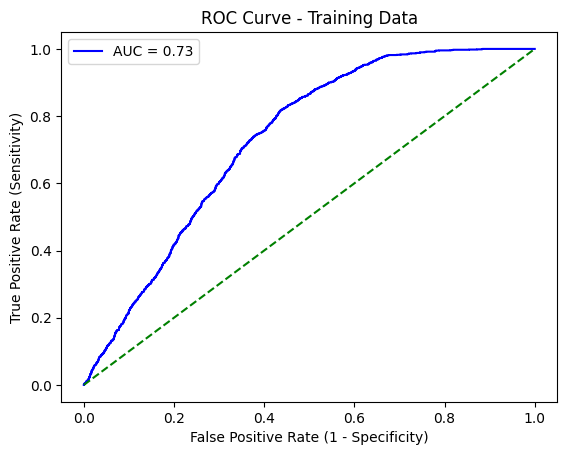

In [259]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_train = logit_model.predict(X_train)

fpr, tpr, thresholds = roc_curve(y_train, y_prob_train)

auc = roc_auc_score(y_train, y_prob_train)

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

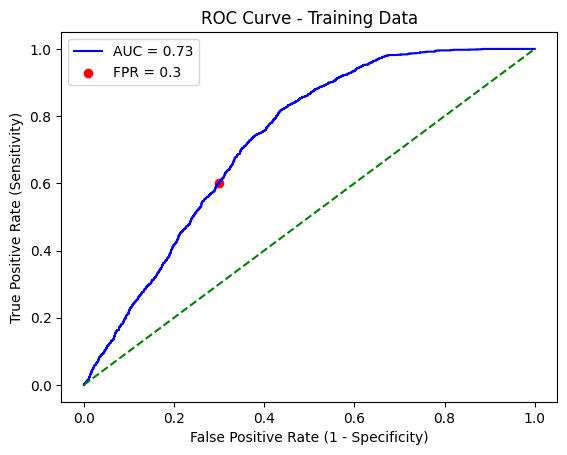

In [260]:
# The point relatively closest to an ideal logistic model is around fpr = 0.3
desired_fpr = 0.30
index = (np.abs(fpr - desired_fpr)).argmin()

plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.scatter(fpr[index], tpr[index], c='red', marker='o', label=f'FPR = {desired_fpr}')
plt.title('ROC Curve - Training Data')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.show()

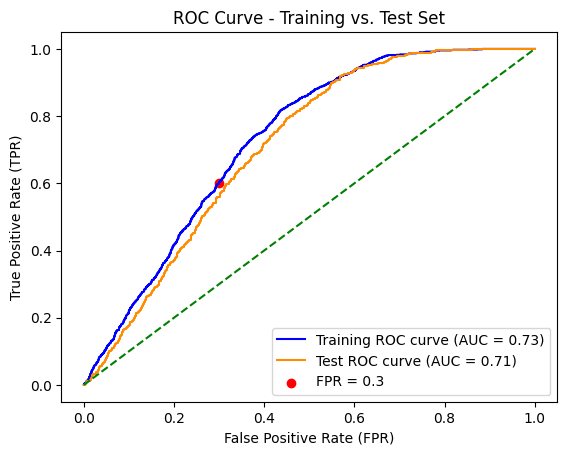

In [261]:
y_probs_test = logit_model.predict(X_test)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_probs_test)
auc_test = roc_auc_score(y_test, y_probs_test)

plt.plot(fpr, tpr, color='blue', label=f'Training ROC curve (AUC = {auc:.2f})')
plt.plot(fpr_test, tpr_test, color='darkorange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.scatter(fpr[index], tpr[index], c='red', marker='o', label=f'FPR = {desired_fpr}')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Training vs. Test Set')
plt.legend()
plt.show()

Based on the ROC curve and AUC values provided in the image, the logistic regression model performed slightly better on the training data than on the test data. The AUC for the training data is 0.73, while the AUC for the test data is 0.71. This suggests that the model performs quite comparable on train and test sets.

In [262]:
y_pred = (y_probs_test >= thresholds[index]).astype(int)

# Calculate accuracy, sensitivity, and specificity
accuracy = sum(y_pred == y_test) / len(y_test)
sensitivity = sum((y_pred == 1) & (y_test == 1)) / sum(y_test == 1)
specificity = sum((y_pred == 0) & (y_test == 0)) / sum(y_test == 0)

print(f'Accuracy: {accuracy:.4f}')
print(f'Sensitivity (True Positive Rate): {sensitivity:.4f}')
print(f'Specificity (True Negative Rate): {specificity:.4f}')

Accuracy: 0.6568
Sensitivity (True Positive Rate): 0.5986
Specificity (True Negative Rate): 0.6818


### Summary

The logistic regression analysis provides insights into the relationship between the selected predictors and the likelihood of having a pool. The ROC curve and AUC values offer a comprehensive evaluation of the model's classification power. The ROC curve for the training data indicates that the model has a reasonable discriminatory power, with an AUC of 0.73. The model's performance on the test data is comparable, with an AUC of 0.71.

Accuracy: The proportion of correctly classified instances is 65.7%.

Sensitivity (True Positive Rate): The ability to correctly identify properties with a pool is 59.9%.

Specificity (True Negative Rate): The ability to correctly identify properties without a pool is 68.2%.

## 4. Descriptive Analytics and Inference

**Research Question 1:** What is the relationship between the suburbs and housing prices in the dataset?

In [263]:
# Preparing df again
df = pd.read_csv("melb.csv")
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date', ascending=False)
df = df.drop_duplicates(subset=['Address', 'Suburb'])
df = df[df.Distance < 26]
df = df[df.Car < 6]
df = df[df.Rooms < 8]
df = df[df.Landsize < 1300]
df = df[df.BuildingArea < 360]
df = df[df.Propertycount < 20000]

In [264]:
df.groupby('Suburb')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Suburb,,,,,,,,
Abbotsford,38.0,1.136316e+06,323939.025399,470000.0,1003125.0,1178250.0,1313750.0,1876000.0
Aberfeldie,24.0,1.286292e+06,553951.926902,380000.0,882750.0,1323000.0,1686250.0,2600000.0
Airport West,49.0,7.657959e+05,161550.071417,450000.0,675000.0,773000.0,850000.0,1220000.0
Albanvale,3.0,5.403333e+05,29838.453937,506000.0,530500.0,555000.0,557500.0,560000.0
Albert Park,34.0,1.950985e+06,866520.064687,442500.0,1340000.0,1825000.0,2330000.0,4735000.0
...,...,...,...,...,...,...,...,...
Williamstown North,9.0,9.843889e+05,453611.464925,367500.0,720000.0,1045000.0,1225000.0,1615000.0
Windsor,26.0,9.643654e+05,571377.870725,275000.0,515750.0,815000.0,1365000.0,2302000.0
Wollert,18.0,6.452778e+05,112899.645993,478000.0,577500.0,615000.0,730000.0,880000.0


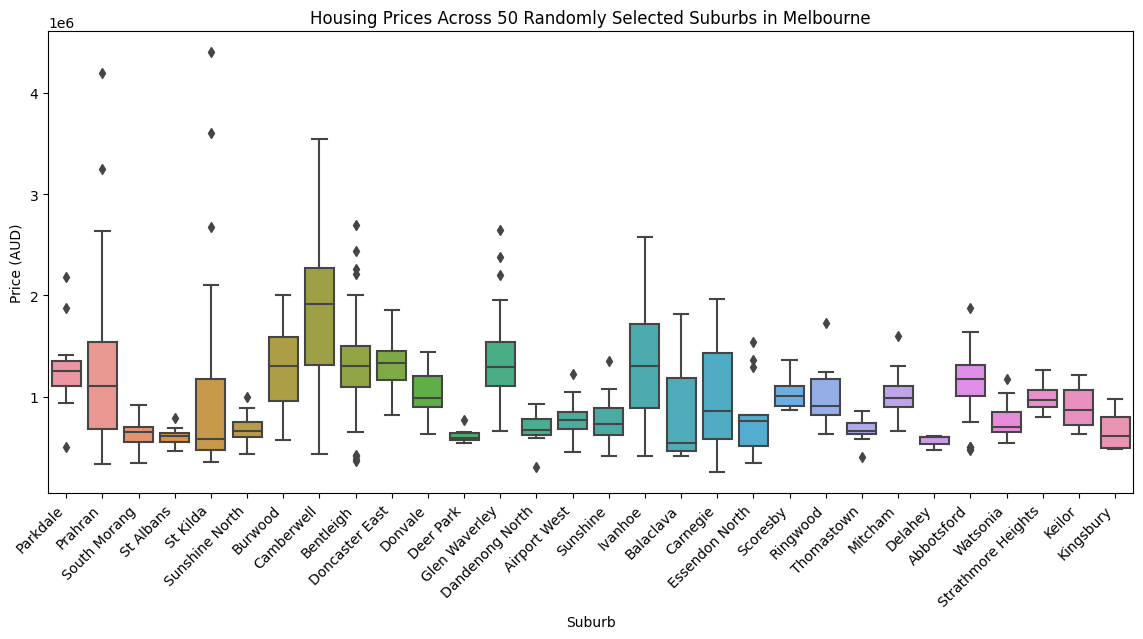

In [265]:
np.random.seed(100303)
random_suburbs = np.random.choice(df['Suburb'].unique(), size=30, replace=False)

df_subset = df[df['Suburb'].isin(random_suburbs)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='Suburb', y='Price', data=df_subset)
plt.title('Housing Prices Across 50 Randomly Selected Suburbs in Melbourne')
plt.xlabel('Suburb')
plt.ylabel('Price (AUD)')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretation:** The most expensive suburbs in this sample are Camberwell and Ivanhoe, with average housing prices over AU$ 1.5 million. The least expensive suburbs are Delahey, St Albans, and Deer Park, with average housing prices around AU$ 700,000.

There is a wide range of housing prices across the suburbs, with the most expensive suburbs being more than twice as expensive as the least expensive suburbs. This suggests that there is a high degree of housing affordability variation in Melbourne.

The plot shows that there is a wide range of housing prices across Melbourne, with some suburbs being significantly more expensive than others.

Note: my categorical variable "Suburb" has too many unique values, so I could only look at a sample of 30 of them and interpret to the best I can.
___________

**Research Question 2:** Is there a significant difference in the mean housing prices between houses west and east of Melbourne University in the Melbourne housing population?
(The coordinates of Melbourne University: -37.798, 144.961).

Null Hypothesis (H0): There is no significant difference in the mean housing prices between houses west and east of Melbourne University.

$H_{0}: \mu_{west} = \mu_{east}$

Alternative Hypothesis (H1): There is a significant difference in the mean housing prices between houses west and east of Melbourne University.

$H_{1}: \mu_{west} \neq \mu_{east}$

In [266]:
# Calculate observed test statistic
# UniMelb: (-37.78623863816805, 144.96671270554634)
prices_west = df[df['Longtitude'] <= 144.9667127]['Price'].values
prices_east = df[df['Longtitude'] > 144.9667127]['Price'].values
observed_diff_mean = np.mean(prices_east) - np.mean(prices_west)

print('Mean Price of houses west of UniMelb: ', prices_west.mean())
print('Mean Price of houses east of UniMelb: ', prices_east.mean())
print('Observed Difference in Mean Prices: ', observed_diff_mean)

Mean Price of houses west of UniMelb:  891983.2063698408
Mean Price of houses east of UniMelb:  1226507.0271512114
Observed Difference in Mean Prices:  334523.8207813706


In [267]:
# We will perform 10,000 simulations
np.random.seed(100303)
num_simulations = 10000

simulated_diff_means = np.zeros(num_simulations)

for i in range(num_simulations):
    shuffled_prices = np.random.permutation(np.concatenate((prices_west, prices_east)))
    shuffled_west = shuffled_prices[:len(prices_west)]
    shuffled_east = shuffled_prices[len(prices_west):]
    simulated_diff_means[i] = np.abs(np.mean(shuffled_east) - np.mean(shuffled_west))

p_value = 2 * np.mean(np.abs(simulated_diff_means) >= np.abs(observed_diff_mean))

print(f'P-value: {p_value:.5f}')

# Using Significance level of 0.05
if p_value <= 0.05:
    print('Reject the null hypothesis. There is a significant difference in mean housing prices.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in mean housing prices.')

P-value: 0.00000
Reject the null hypothesis. There is a significant difference in mean housing prices.


**Summary:**

The obtained p-value of 0.00 is less than the common significance level of 0.05. Therefore, we reject the null hypothesis. This leads to the conclusion that there is a significant difference in mean housing prices between houses west and east of Melbourne University in the Melbourne housing population.

In other words, the analysis suggests that the geographical location (west or east of Melbourne University) is associated with a statistically significant difference in housing prices. The observed difference in mean prices is unlikely to have occurred by random chance alone, based on the conducted simulation.

## 5. Conclusion

This study aimed to investigate the relationship between housing prices and various factors in the Melbourne housing market using linear regression and logistic regression techniques. The analysis focused on identifying the most influential predictors of housing prices, assessing the performance of a logistic regression model in predicting whether a property has a private pool, and comparing housing prices by directions from the University of Melbourne.

The linear regression analysis revealed that the number of rooms, distance from the CBD, year built, number of bathrooms, building area, seller, property type, and suburb are significant predictors of housing prices. The model explained approximately 75.0% of the variability in housing prices, indicating a good fit for the data.

The logistic regression analysis demonstrated that the number of rooms, price, distance from the CBD, number of car spots, and year built are significant predictors of whether a property has a private pool. The model achieved an AUC score of 0.73 on the training data, suggesting a fair level of discrimination between properties with and without pools.
____
**Limitations and Future Work**

It is important to acknowledge the limitations of this study. The data used for the analysis may have biases and is only updated to 2018. Additionally, the logistic regression model did not perfectly meet all assumptions for regression models, which might make it not the most appropriate model for the dataset.

Future research could focus on addressing these limitations by utilizing more comprehensive and reliable data sources and exploring alternative modeling techniques, which may better capture the nonlinear relationships between the variables and the response variable. Furthermore, incorporating additional variables such as economic indicators, mortgage rates, and neighborhood characteristics could enhance the predictive power of the models.

Overall, the insights derived from this analysis can serve as a decision support tool for people interested in the Melbourne housing market.

____________